# Sprint 1 - Lab 5 - Entrenamiento 2

# Realizar análisis de Componentes

**1. Preparación y limpieza de datos**

Importar Librerias necesarias

In [27]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



 Cargar y previsualizar Dataset
<!--  -->

In [28]:
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**2. Exploración y limpieza de datos**

In [31]:
#valores faltantes
print('Valores faltantes por columna: ')
print(df.isna().sum())

#separo columnas numericas y categoricas
numericas = df.select_dtypes(include=[np.number]).columns
categoricas = df.select_dtypes(include=["object"]).columns

print("Variables numericas:", list(numericas))
print("Variables categoricas: ", list(categoricas))


Valores faltantes por columna: 
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Variables numericas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variables categoricas:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Bldg

Imputación de faltantes

In [32]:


# --- Imputación para numéricas ---
imputer_num = SimpleImputer(strategy="median")
df[numericas] = imputer_num.fit_transform(df[numericas])

# --- Imputación para categóricas ---
imputer_cat = SimpleImputer(strategy="most_frequent")
df[categoricas] = imputer_cat.fit_transform(df[categoricas])

# Comprobar que no quedan valores faltantes
print("Valores faltantes después de la imputación:")
print(df.isnull().sum().sum())  # debería ser 0


Valores faltantes después de la imputación:
0


Codificar variables categoricas

In [33]:
#Codificación one-hot de variables categoricas
df_encoded = pd.get_dummies(df, columns=categoricas,drop_first=False)

# Verificamos que ya no queden columnas categóricas
print("Tipos de datos después de codificación:")
print(df_encoded.dtypes.value_counts())

print("\nForma final del dataset:", df_encoded.shape)
df_encoded.head()



Tipos de datos después de codificación:
bool       251
float64     38
Name: count, dtype: int64

Forma final del dataset: (1460, 289)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,False,False,False,True,False,False,False,False,True,False
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,False,False,False,True,False,False,False,False,True,False
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,False,False,False,True,False,False,False,False,True,False
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,False,False,False,True,True,False,False,False,False,False
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,False,False,False,True,False,False,False,False,True,False


**3. Normalización de los Datos**

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_data)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


**4. Aplicación del PCA**

In [41]:


# Número de componentes (si hay menos columnas que 30, usa las que haya)
n_features = df_scaled.shape[1]
n_comp = min(30, n_features)

# PCA
pca = PCA(n_components=n_comp, random_state=42)
X_pca = pca.fit_transform(df_scaled)

# Varianza explicada (individual y acumulada)
var_exp = pca.explained_variance_ratio_              # array de longitud n_comp
var_exp_acum = np.cumsum(var_exp)                    # acumulada

# Chequeos rápidos
print("Forma de X_pca:", X_pca.shape)                # (n_muestras, n_comp)
print("Varianza explicada (primeras 5):", np.round(var_exp[:5], 4))
print("Varianza acumulada (último valor):", np.round(var_exp_acum[-1], 4))




Forma de X_pca: (1460, 30)
Varianza explicada (primeras 5): [0.0644 0.0289 0.0239 0.0198 0.0166]
Varianza acumulada (último valor): 0.3985


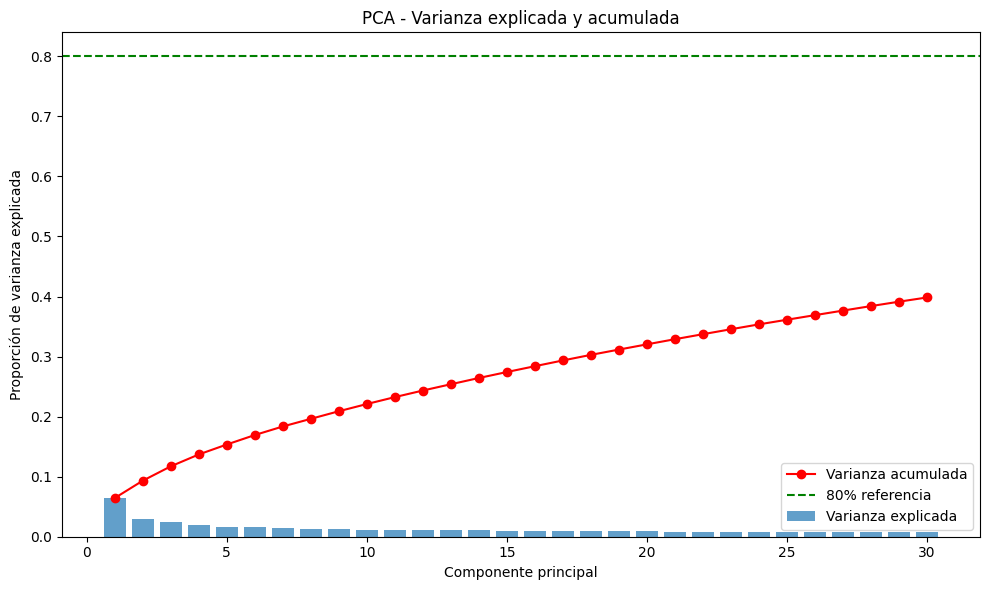

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Barras: varianza explicada individual
plt.bar(range(1, n_comp+1), var_exp, alpha=0.7, label="Varianza explicada")

# Línea: varianza acumulada
plt.plot(range(1, n_comp+1), var_exp_acum, marker="o", color="red", label="Varianza acumulada")

# Detalles del gráfico
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza explicada")
plt.title("PCA - Varianza explicada y acumulada")
plt.axhline(y=0.8, color="green", linestyle="--", label="80% referencia")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Varianza explicada acumulada por los 30 componentes (o n_comp si hay menos)
var_acum_total = var_exp_acum[-1]

print(f"Varianza explicada acumulada por los {n_comp} componentes: {var_acum_total:.4f}")
if var_acum_total >= 0.80:
    print("✅ La reducción ha sido efectiva (≥ 80% de varianza retenida).")
else:
    print("ℹ️ La varianza retenida es < 80%. Podrías aumentar componentes para capturar más,")



Varianza explicada acumulada por los 30 componentes: 0.3985
ℹ️ La varianza retenida es < 80%. Podrías aumentar componentes para capturar más,
   pero no es necesario para este proyecto según los requisitos.


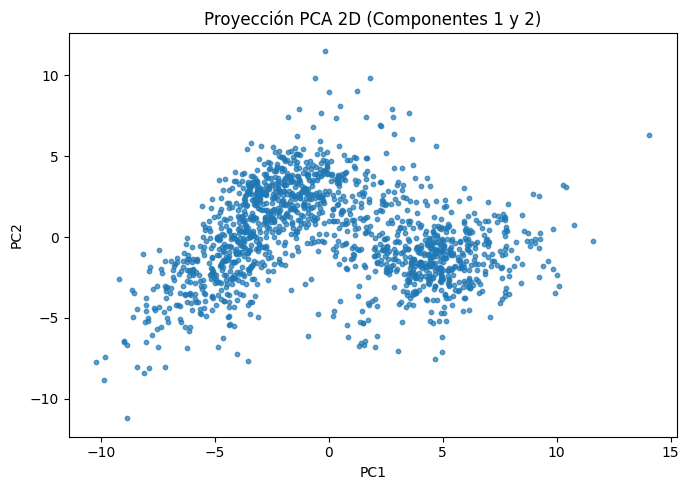

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.7)
plt.title("Proyección PCA 2D (Componentes 1 y 2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
